In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
#0
hr = 0.87
far = 0.23
d_prime = sp.stats.norm.ppf(1-far) - sp.stats.norm.ppf(1-hr)
threshold = sp.stats.norm.ppf(1 - far, loc = 0, scale = 1)
print 'd\' = %f' %(d_prime)
print 'Threshold = %f' %(threshold)

d' = 1.865238
Threshold = 0.738847


In [3]:
#1
def roc_curve(threshold_values,mean1,mean2):
    false_alarm_rate = np.zeros(threshold_values.size)
    hit_rate = np.zeros(threshold_values.size)
    for index, value in enumerate(threshold_values):
        false_alarm_rate[index] = 1 - sp.stats.norm.cdf(value,loc=mean1)
        hit_rate[index] = 1 - sp.stats.norm.cdf(value,loc=mean2)
    return false_alarm_rate, hit_rate

mean1 = 0
mean2 = 1
threshold = np.array([0.3])
false_alarm_rate, hit_rate = roc_curve(threshold, mean1, mean2)
print 'False alarm rate = %f' %(false_alarm_rate)

False alarm rate = 0.382089


In [4]:
#2
print 'Hit rate = %f' %(hit_rate)

Hit rate = 0.758036


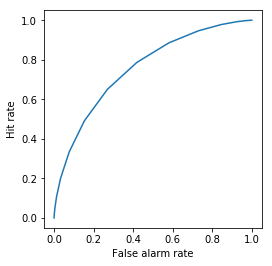

In [5]:
#3
start=-10
stop=10
x = np.linspace(-10,10)
false_alarm_rate, hit_rate = roc_curve(x, mean1, mean2)
plt.plot(false_alarm_rate, hit_rate)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("False alarm rate")
plt.ylabel("Hit rate")

In [6]:
#4
auc = metrics.auc(false_alarm_rate, hit_rate)
print 'AUC = %f' %(auc)

AUC = 0.757231


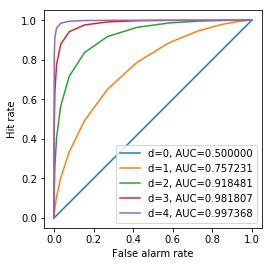

In [7]:
#5
for d in range(0,5):
    far, hr= roc_curve(x,0,d)
    auc = metrics.auc(far, hr)
    plt.plot(far,hr, label = "d=%d, AUC=%f" %(d, auc))
    plt.xlabel('False alarm rate')
    plt.ylabel('Hit rate')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

In [8]:
#6
def gauss(y):
    return 2/np.sqrt(np.pi)*np.exp(-y**2)

def erfc(x):
    value, error = sp.integrate.quad(gauss, x, np.inf)
    return value

for d in range(0,5):
    print 'd=%d, AUC=%f' %(d, erfc(-d*1.0/2)/2)


d=0, AUC=0.500000
d=1, AUC=0.760250
d=2, AUC=0.921350
d=3, AUC=0.983053
d=4, AUC=0.997661
